In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

Reading Data as a DataFrame name UCI

In [3]:
UCI = pd.read_csv("./heart_disease_uci.csv")
UCI.head(3)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1


Finding Duplicate and No Duplicate Row found

In [4]:
UCI.duplicated().sum()

0

Finding the Null or None values in DataFrame according to Columns

In [5]:
UCI.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
# Checking the shape of DataFrame
UCI.shape

(920, 16)

Deleting the Columns in DataSet having more Null Values

In [7]:
UCI.drop(["ca", "thal"], axis=1, inplace=True)

In [8]:
UCI.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
num           0
dtype: int64

Filling the Null Values in the Columns of the dataframe

In [9]:
UCI["oldpeak"].fillna(UCI["oldpeak"].mean(),  inplace = True)
UCI["thalch"].fillna(UCI["thalch"].mean(),  inplace = True)
UCI["trestbps"].fillna(UCI["trestbps"].mean(),  inplace = True)
UCI["chol"].fillna(UCI["chol"].mean(),  inplace = True)

In [10]:
UCI.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
num           0
dtype: int64

Now removing Null values from object dataType Columns

In [11]:
UCI["fbs"].fillna(False,  inplace = True)

In [12]:
UCI["restecg"].value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [13]:
UCI["restecg"].fillna("normal",  inplace = True)

In [14]:
UCI["exang"].value_counts()
UCI["exang"].fillna(False,  inplace = True)

In [15]:
UCI["slope"].value_counts()
UCI["slope"].fillna("flat",  inplace = True)

In [16]:
UCI.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

### Featuring Engineering on DataFrame

Converting Boolian data into Int

In [18]:
UCI["fbs"] = UCI["fbs"].astype("int")
UCI["exang"] = UCI["exang"].astype("int")

Mapping Object features into a Nummerical feature and Encoding Them

In [19]:
UCI["cp"].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

In [20]:
df = UCI
labels=['asymptomatic', 'non-anginal', 'atypical angina', 'typical angina']
mapping = {label: i for i, label in enumerate(labels)}
df["cp"] = UCI["cp"].map(mapping)


In [21]:
labels=['Male', 'Female']
mapping = {label: i for i, label in enumerate(labels)}
df["sex"] = UCI["sex"].map(mapping)

In [22]:
df["slope"].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [23]:
labels=['downsloping', 'flat', 'upsloping']
mapping = {label: i for i, label in enumerate(labels)}
df["slope"] = UCI["slope"].map(mapping)

In [24]:
UCI['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [25]:
labels = ['lv hypertrophy', 'normal', 'st-t abnormality']
mapping = {label: i for i, label in enumerate(labels)}
df["restecg Encoded"] = df["restecg"].map(mapping)

Now, Doing one hot Encoding on categorical variables

In [26]:
df= pd.get_dummies(df, columns=["sex", "exang", 'fbs', 'cp', 'slope'])

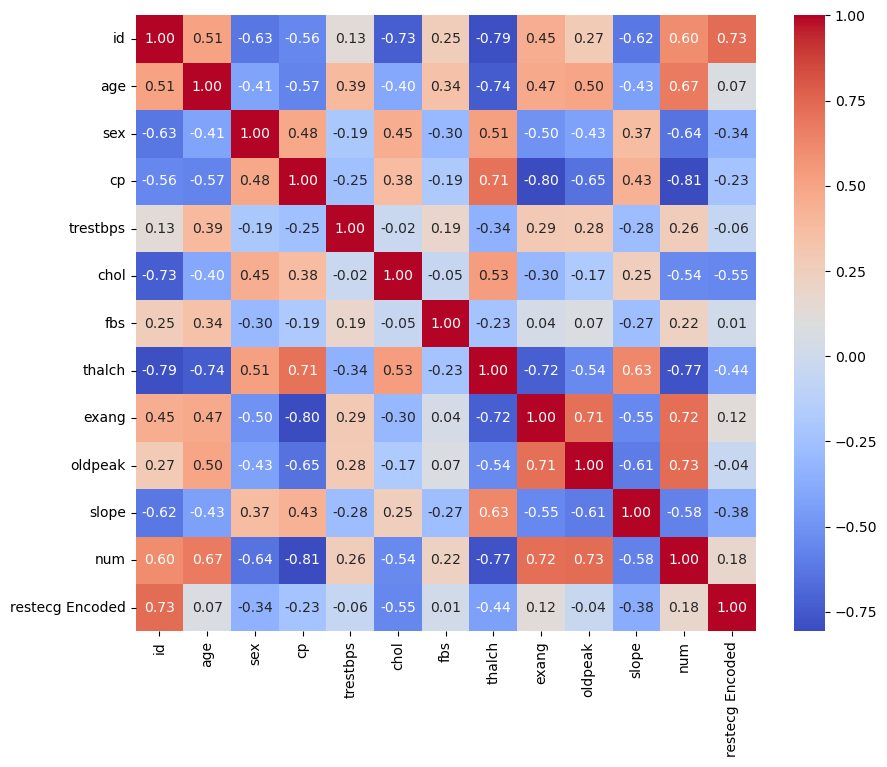

In [79]:
plt.figure(figsize=(10, 8))
Matrix = df.corr()
sns.heatmap(Matrix, annot= True, cmap="coolwarm", fmt=".2f")
plt.show()

### Functions Ready for Model Training
- Traget: restecg
- Features are: oldpeak, exang, age, fbs, trestbps

In [27]:
df.columns

Index(['id', 'age', 'dataset', 'trestbps', 'chol', 'restecg', 'thalch',
       'oldpeak', 'num', 'restecg Encoded', 'sex_0', 'sex_1', 'exang_0',
       'exang_1', 'fbs_0', 'fbs_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'slope_0',
       'slope_1', 'slope_2'],
      dtype='object')

Traing and Target Data

In [28]:
X = df.drop(['id', 'dataset', 'restecg' ,'restecg Encoded'], axis = 1)
Y = df['restecg']
X.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num', 'sex_0', 'sex_1',
       'exang_0', 'exang_1', 'fbs_0', 'fbs_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3',
       'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

Train Test Split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=10)
X_train.shape

(644, 19)

As Its a Classification Problem so using models like:
- Logistic Regression
- DecisionTreeClassifier
- RandomForestClassifier 

### Logistic Regression

In [30]:
model = LogisticRegression()
target =  (df["restecg"] == 'normal').astype(int)

x_train, x_test, target_train, target_test = train_test_split(X,target, test_size=0.3, random_state=10)


model.fit(x_train, target_train)

c:\Users\ABC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
target_pred = model.predict(x_test)
Accuracy_LR = accuracy_score(target_pred, target_test)
Accuracy_LR

0.6195652173913043

### Decsion Tree Classifier

In [32]:
model  = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [33]:
Y_pred = model.predict(X_test)
Accuracy_DT = accuracy_score(Y_pred, Y_test)
Accuracy_DT

0.4963768115942029

### Random Forest Classifier

In [34]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, Y_train)

RandomForestClassifier()

In [35]:
Y_pred = model.predict(X_test)
accuracy_RF = accuracy_score(Y_test, Y_pred)
accuracy_RF

0.5905797101449275

## Hyper Tunning On Decision Tree and Rnadom Forest

### Decision Tree

Grid Search

In [36]:
param_grid = {
    'max_depth': [2, 4, 5, 15, 10, 20],
    'min_samples_split': [1, 3, 2, 5, 10],
    'min_samples_leaf': [3, 1, 2, 4, 5, 6],
    'max_features': [1.0, 'sqrt']
}

In [37]:
model = DecisionTreeClassifier()
# cv is k-fold cross validation 
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 5, 15, 10, 20],
                         'max_features': [1.0, 'sqrt'],
                         'min_samples_leaf': [3, 1, 2, 4, 5, 6],
                         'min_samples_split': [1, 3, 2, 5, 10]})

In [38]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [39]:
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
accuracy_HPT_DT = accuracy_score(Y_test,Y_pred)
accuracy_HPT_DT

0.5978260869565217

Random Search

In [40]:
param_dist_RS = {
    'max_depth': [2, 4, 5, 15, 10, 20],
    'min_samples_split': randint(1, 30),
    'min_samples_leaf': randint(1, 20),
    'max_features': [1.0, 'sqrt']
}

In [41]:
model = DecisionTreeClassifier()
random_search = RandomizedSearchCV(model, param_distributions=param_dist_RS, n_iter=10, cv=5)

random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [2, 4, 5, 15, 10, 20],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026C74C435B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026C74C40340>})

In [42]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'min_samples_split': 14}


In [43]:
best_model = random_search.best_estimator_
Y_pred = best_model.predict(X_test)
accuracy_HPT_DT_RS = accuracy_score(Y_test,Y_pred)
accuracy_HPT_DT_RS

0.5869565217391305

###  Random Forest

In [64]:
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [1, 2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [65]:
model = RandomForestClassifier(n_estimators = 54)
# cv is k-fold cross validation 
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=54),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [1, 2, 3, 4, 5, 6]})

In [66]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [67]:
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
accuracy_HPT_RF = accuracy_score(Y_test,Y_pred)
accuracy_HPT_RF

0.6014492753623188

Random Search

In [69]:
param_dist_RS = {
    'max_depth': [2, 4, 6, 10],
    'min_samples_split': randint(1, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': [1.0, 'sqrt']
}

In [70]:
model = RandomForestClassifier(n_estimators = 50)
random_search = RandomizedSearchCV(model, param_distributions=param_dist_RS, n_iter=10, cv=5)

random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=50),
                   param_distributions={'max_depth': [2, 4, 6, 10],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026C74C40070>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026C74C40BB0>})

In [71]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 14}


In [74]:
best_model = random_search.best_estimator_
Y_predict = best_model.predict(X_test)
accuracy_HPT_RF_RS = accuracy_score(Y_test,Y_predict)
accuracy_HPT_RF_RS

0.605072463768116




### Results in a Table

In [75]:
data = {"Accuracy": ["Logistic Regression", "DecisionTreeClassifier", "RandomForestClassifier", "DecisionTreeClassifier HPT GS", "DecisionTreeClassifier HPT RS", "RandomForestClassifier HPT GS", "RandomForestClassifier HPT RS"],
        "Values": [Accuracy_LR, Accuracy_DT, accuracy_RF, accuracy_HPT_DT, accuracy_HPT_DT_RS, accuracy_HPT_RF, accuracy_HPT_RF_RS]}

In [77]:
results = pd.DataFrame(data)
results

,Accuracy,Values
0,Logistic Regression,0.619565
1,DecisionTreeClassifier,0.496377
2,RandomForestClassifier,0.590580
3,DecisionTreeClassifier HPT GS,0.597826
4,DecisionTreeClassifier HPT RS,0.586957
5,RandomForestClassifier HPT GS,0.601449
6,RandomForestClassifier HPT RS,0.605072


### Conclusion

As Data is not sufficient, only having 920 rows. So, Accuracy is Low. With more data we can have more Accuracy